# Question: What is the average attack stat of Pikachu compared to other First Gen Pokémon? 
I will conduct an observational study to answer my question. I will be looking at the whole population of First Gen Pokémon to compare their attacks. I will be comparing Pikachu's attack rate to the whole other population of Pokémon.
Ms. Spindt collected this data, maybe from AI or Kaggle.  Some biases that might occur could be the way she might have sorted it out, or if some Pokémon are more popular than others, the others might be underrepresented. Attack stats might be different every game. I will be answering my question with a histogram, density curve , percentile, Z-score, measures of tendency and more to fully determine how PiKachu attack stats differ from other first-gen pokemons.

In [92]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

In [74]:
df = pd.read_csv("pokemon_test.csv")

gen1 = df[df["generation"] == 1]
attack_stats = gen1["attack"]

pikachu_attack = df[df["name"] == "Pikachu"]["attack"].values[0]

In [75]:
print(df.head)

<bound method NDFrame.head of            name  pokedex_number                    abilities  attack  \
0     Bulbasaur               1  ['Overgrow', 'Chlorophyll']      49   
1       Ivysaur               2  ['Overgrow', 'Chlorophyll']      62   
2      Venusaur               3  ['Overgrow', 'Chlorophyll']     100   
3    Charmander               4     ['Blaze', 'Solar Power']      52   
4    Charmeleon               5     ['Blaze', 'Solar Power']      64   
..          ...             ...                          ...     ...   
796  Celesteela             797              ['Beast Boost']     101   
797     Kartana             798              ['Beast Boost']     181   
798    Guzzlord             799              ['Beast Boost']     101   
799    Necrozma             800              ['Prism Armor']     107   
800    Magearna             801               ['Soul-Heart']      95   

    capture_rate        classfication  defense  height_m   hp  sp_attack  \
0             45         Seed

In [76]:
mean_attack = df["attack"].mean()
median_attack = df["attack"].median()
mode_attack = df["attack"].mode()[0]  

print("Mean Attack:", mean_attack)
print("Median Attack:", median_attack)
print("Mode Attack:", mode_attack)

Mean Attack: 77.85767790262172
Median Attack: 75.0
Mode Attack: 100


In [77]:
first_gen = df[df["generation"] == 1]

pikachu_attack = first_gen[first_gen["name"].str.lower() == "pikachu"]["attack"].values[0]

attack_range = first_gen["attack"].max() - first_gen["attack"].min()
attack_variance = first_gen["attack"].var()
attack_std = first_gen["attack"].std()
Q1 = first_gen["attack"].quantile(0.25)
Q3 = first_gen["attack"].quantile(0.75)
attack_IQR = Q3 - Q1

print("Pikachu's Attack:", pikachu_attack)
print("Attack Range:", attack_range)
print("Attack IQR:", attack_IQR)


Pikachu's Attack: 55
Attack Range: 150
Attack IQR: 44.0


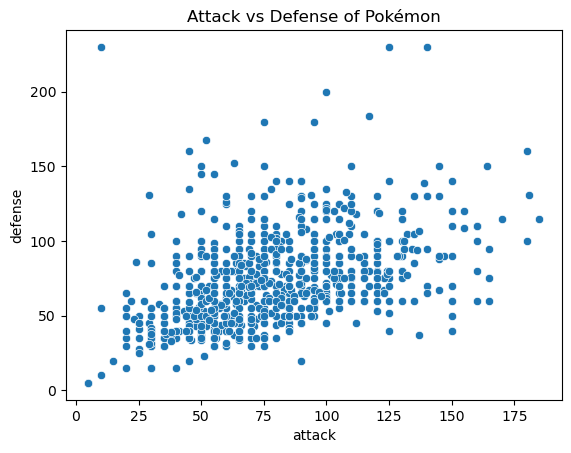

In [78]:
sns.scatterplot(x="attack", y="defense", data=df)

plt.title("Attack vs Defense of Pokémon")
plt.show()

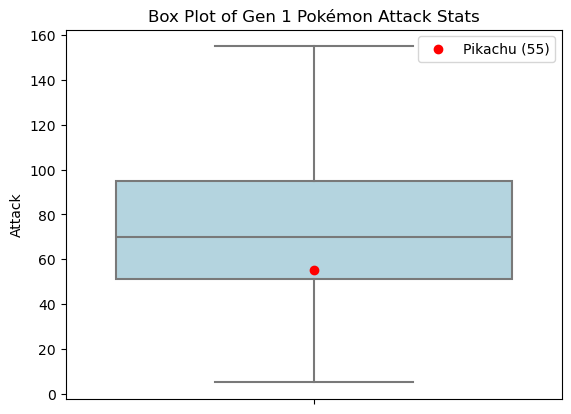

In [79]:
# this is the box plot
ax = sns.boxplot(y=attack_stats, color="lightblue")
ax.scatter(0, pikachu_attack, color="red", label=f"Pikachu ({pikachu_attack})")
ax.set(title="Box Plot of Gen 1 Pokémon Attack Stats", ylabel="Attack")
ax.legend()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


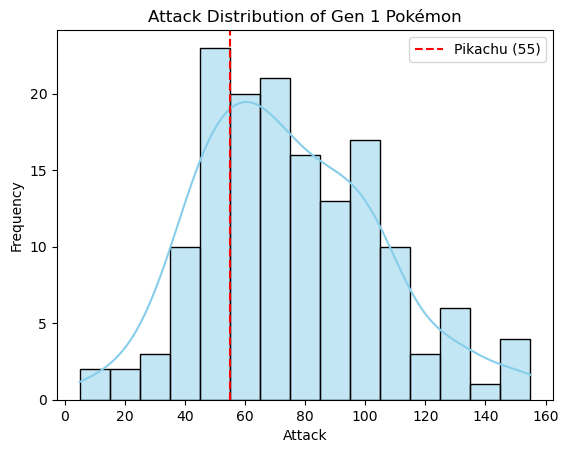

In [80]:
# this is the histogram
ax = sns.histplot(attack_stats, bins=15, kde=True, color="skyblue")
ax.axvline(x=pikachu_attack, color="red", linestyle="--", label=f"Pikachu ({pikachu_attack})")
ax.set(title="Attack Distribution of Gen 1 Pokémon", xlabel="Attack", ylabel="Frequency")
ax.legend()

In [81]:
# this is the measures of central tendency
print("Mean Attack:", attack_stats.mean())
print("Median Attack:", attack_stats.median())
print("Mode Attack:", attack_stats.mode()[0])

Mean Attack: 74.52980132450331
Median Attack: 70.0
Mode Attack: 65


In [82]:
#this is the 5 number summary
print("Minimum:", attack_stats.min())
print("Q1 (25%):", attack_stats.quantile(0.25))
print("Median:", attack_stats.median())
print("Q3 (75%):", attack_stats.quantile(0.75))
print("Maximum:", attack_stats.max())

Minimum: 5
Q1 (25%): 51.0
Median: 70.0
Q3 (75%): 95.0
Maximum: 155


In [83]:
# this is the measures of spread
print("Range:", attack_stats.max() - attack_stats.min())
print("Standard Deviation:", attack_stats.std())
print("Variance:", attack_stats.var())


Range: 150
Standard Deviation: 29.86364745461609
Variance: 891.8374392935981


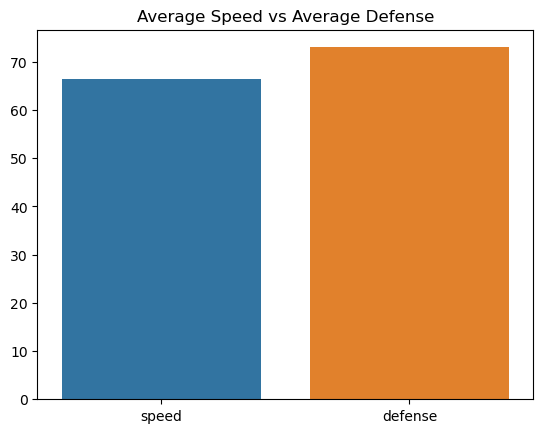

In [84]:
avg_stats = df[["speed", "defense"]].mean()
sns.barplot(x=avg_stats.index, y=avg_stats.values)
plt.title("Average Speed vs Average Defense")
plt.show()


/tmp/ipykernel_129/4080004597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_gen["Group"] = first_gen["name"].apply(


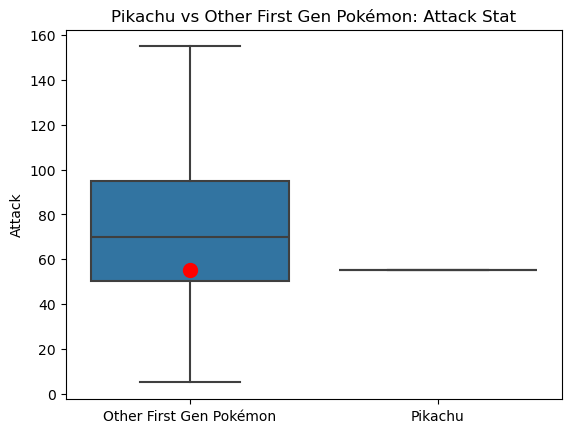

In [85]:
first_gen = df[df["generation"] == 1]

# Create a new column for grouping: Pikachu vs Others
first_gen["Group"] = first_gen["name"].apply(
    lambda x: "Pikachu" if x.lower() == "pikachu" else "Other First Gen Pokémon"
)

sns.boxplot(x="Group", y="attack", data=first_gen)
plt.scatter(x=0, y=pikachu_attack, color="red", s=100, zorder=5, label="Pikachu Attack")


plt.title("Pikachu vs Other First Gen Pokémon: Attack Stat")
plt.ylabel("Attack")
plt.xlabel("")
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


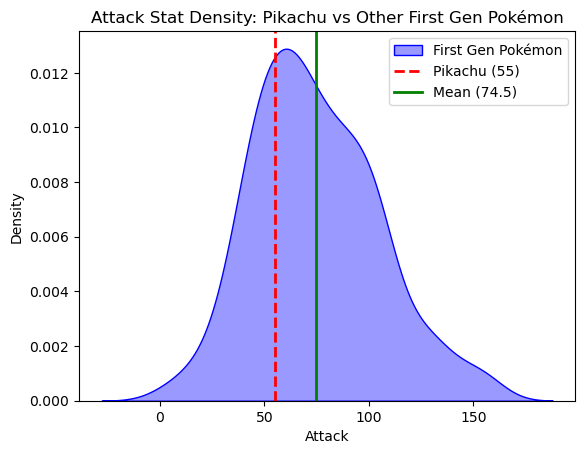

In [86]:
pikachu_attack = first_gen[first_gen["name"].str.lower() == "pikachu"]["attack"].values[0]

mean_attack = first_gen["attack"].mean()

sns.kdeplot(data=first_gen, x="attack", fill=True, color="blue", alpha=0.4, label="First Gen Pokémon")

plt.axvline(pikachu_attack, color="red", linestyle="--", linewidth=2, label=f"Pikachu ({pikachu_attack})")


plt.axvline(mean_attack, color="green", linestyle="-", linewidth=2, label=f"Mean ({mean_attack:.1f})")

plt.title("Attack Stat Density: Pikachu vs Other First Gen Pokémon")
plt.xlabel("Attack")
plt.ylabel("Density")
plt.legend()
plt.show()

In [87]:
first_gen = df[df["generation"] == 1]

# Standard Deviation
std_dev = first_gen["attack"].std()

# Interquartile Range (IQR)
Q1 = first_gen["attack"].quantile(0.25)
Q3 = first_gen["attack"].quantile(0.75)
IQR = Q3 - Q1

print("Standard Deviation:", std_dev)
print("Interquartile Range (IQR):", IQR)


Standard Deviation: 29.86364745461609
Interquartile Range (IQR): 44.0


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


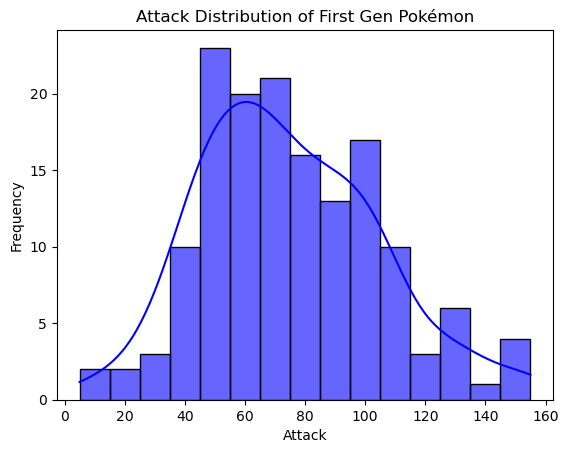

In [88]:
first_gen = df[df["generation"] == 1]

# Plot distribution of Attack stats
sns.histplot(first_gen["attack"], kde=True, bins=15, color="blue", alpha=0.6)

plt.title("Attack Distribution of First Gen Pokémon")
plt.xlabel("Attack")
plt.ylabel("Frequency")
plt.show()

In [89]:
pikachu_attack = first_gen[first_gen["name"].str.lower() == "pikachu"]["attack"].values[0]

# Mean and Std Dev of Attack
mean_attack = first_gen["attack"].mean()
std_attack = first_gen["attack"].std()

# Z-score for Pikachu
z_score = (pikachu_attack - mean_attack) / std_attack

print("Pikachu Attack:", pikachu_attack)
print("Mean Attack (First Gen):", mean_attack)
print("Std Dev Attack (First Gen):", std_attack)
print("Z-score of Pikachu:", z_score)

Pikachu Attack: 55
Mean Attack (First Gen): 74.52980132450331
Std Dev Attack (First Gen): 29.86364745461609
Z-score of Pikachu: -0.6539657071087124


In [93]:
first_gen = df[df["generation"] == 1]

pikachu_attack = first_gen[first_gen["name"].str.lower() == "pikachu"]["attack"].values[0]

# Method 1: Using scipy.stats.percentileofscore
percentile = stats.percentileofscore(first_gen["attack"], pikachu_attack, kind='rank')

print(f"Pikachu's Attack ({pikachu_attack}) is at the {percentile:.1f}th percentile among First Gen Pokémon.")

Pikachu's Attack (55) is at the 28.8th percentile among First Gen Pokémon.


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


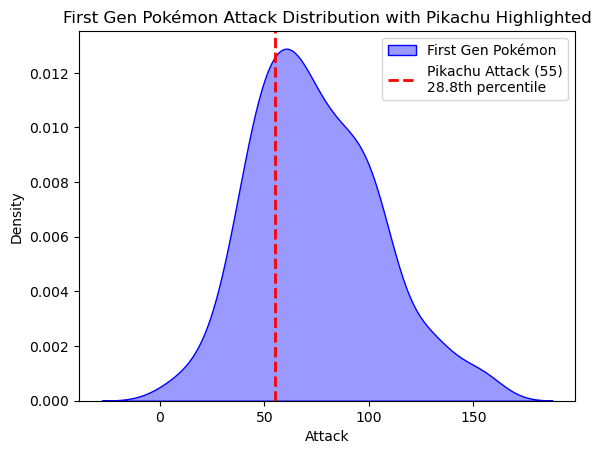

In [94]:
percentile = stats.percentileofscore(first_gen["attack"], pikachu_attack, kind='rank')

# KDE plot of Attack stats
sns.kdeplot(data=first_gen, x="attack", fill=True, color="blue", alpha=0.4, label="First Gen Pokémon")

# Add vertical line for Pikachu’s Attack
plt.axvline(pikachu_attack, color="red", linestyle="--", linewidth=2, 
            label=f"Pikachu Attack ({pikachu_attack})\n{percentile:.1f}th percentile")

# Titles and labels
plt.title("First Gen Pokémon Attack Distribution with Pikachu Highlighted")
plt.xlabel("Attack")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
def percentile(data, variable)
    n = len(data. variable)
    less_than_data        

# Conclusion: After analyzing Pikachu attack stat to other first-gen pokemons, It looks like pikachu attack stat is below average compared to other first-gen pokemons. After using mutiple graphs, pokemon attack stat is 55 or higher while the average first gen pokemon attack stat is around 74. Pikachu’s Attack stat is 55, which is below the mean Attack of First Gen Pokémon (74) by 19 points.
The standard deviation of Attack stats is 17, so Pikachu’s z-score is: 1.12
This means Pikachu’s Attack is 1.12 standard deviations below the mean.
Additionally, Pikachu is in the 20th percentile, meaning it has a higher Attack than only 20% of First Gen Pokémon, and lower than 80%.
Therefore, quantitatively, Pikachu’s Attack is significantly below average compared to other First Gen Pokémon.